In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt


In [3]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size

INIT_LR = 1e-3
epochs=25
bs=8

In [4]:
#The path to our input dataset images.
dataset_dir='D:\Python\Interview_Data\AI_MODEL\YE358311_Fender_apron'
print(dataset_dir)
plot_path='D:\Python\Interview_Data\AI_MODEL\Plot'
model_path='D:\Python\Interview_Data\AI_MODEL\Model'

D:\Python\Interview_Data\AI_MODEL\YE358311_Fender_apron


In [5]:
# Load and preprocess our X-ray data:
'''To load our data, we grab all paths to images in the dataset_dir directory . Then, for each imagePath, we:

Extract the class label (either covid or normal) from the path
Load the image, and preprocess it by converting to RGB channel ordering, and resizing it to 224×224 pixels so that it is ready for our Convolutional Neural Network.
Update our data and labels lists respectively '''

#We then scale pixel intensities to the range [0, 1] and convert both our data and labels to NumPy array format.
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

print("[INFO] loading images...")

imagePaths = list(paths.list_images(dataset_dir))
data = []
labels = []
# loop over the image paths

for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
data1 = data.copy()
labels1 = labels.copy()
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 255]
data = np.array(data) / 255.0
print(data)
labels = np.array(labels)
print(labels)


[INFO] loading images...
[[[[0.39607843 0.3372549  0.56862745]
   [0.42352941 0.34901961 0.59607843]
   [0.36862745 0.3254902  0.56078431]
   ...
   [0.43137255 0.36862745 0.61568627]
   [0.42352941 0.36078431 0.60784314]
   [0.43137255 0.36862745 0.62352941]]

  [[0.40392157 0.32941176 0.58431373]
   [0.39215686 0.31372549 0.55294118]
   [0.38039216 0.3254902  0.55686275]
   ...
   [0.42745098 0.36470588 0.61176471]
   [0.44313725 0.38823529 0.62745098]
   [0.41176471 0.34901961 0.59215686]]

  [[0.4        0.3372549  0.58039216]
   [0.4        0.3254902  0.57254902]
   [0.30196078 0.23921569 0.48235294]
   ...
   [0.43921569 0.35686275 0.61960784]
   [0.41960784 0.34901961 0.59215686]
   [0.41568627 0.35686275 0.61960784]]

  ...

  [[0.37254902 0.29803922 0.51372549]
   [0.3372549  0.27058824 0.48235294]
   [0.34509804 0.28627451 0.50196078]
   ...
   [0.34901961 0.30588235 0.5254902 ]
   [0.37254902 0.29803922 0.5254902 ]
   [0.36470588 0.29019608 0.51372549]]

  [[0.34509804 0.262

In [6]:
# One-hot encode our labels and create our training/testing splits:
# construct our data split, reserving 80% of the data for training and 20% for testing.
#In order to ensure that our model generalizes, we perform data augmentation by setting the random image rotation setting to 15 degrees clockwise or counterclockwise. 
#I have Initialize the data augmentation generator object.
# perform one-hot encoding on the labels

lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels = to_categorical(labels)
print(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
print(trainAug)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [7]:
#Initialize our VGGNet model and set it up for fine-tuning:

'''We then freeze the CONV weights of VGG16 such that only the FC layer head will be trained; this completes our fine-tuning setup.

# load the VGG16 network, ensuring the head FC layer sets are left
# off'''

baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=bs),
    steps_per_epoch=len(trainX) // bs,
    validation_data=(testX, testY),
    validation_steps=len(testX) // bs,
    epochs=epochs)

[INFO] compiling model...
[INFO] training head...
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
25/25 [==============================] - 119s 5s/step - loss: 0.7298 - acc: 0.5300 - val_loss: 0.6830 - val_acc: 0.5600
Epoch 2/25
25/25 [==============================] - 121s 5s/step - loss: 0.7239 - acc: 0.5600 - val_loss: 0.6954 - val_acc: 0.5200
Epoch 3/25
25/25 [==============================] - 121s 5s/step - loss: 0.6471 - acc: 0.6450 - val_loss: 0.7033 - val_acc: 0.5400
Epoch 4/25
25/25 [==============================] - 123s 5s/step - loss: 0.6622 - acc: 0.5950 - val_loss: 0.6796 - val_acc: 0.6000
Epoch 5/25
25/25 [==============================] - 120s 5s/step - loss: 0.6310 - acc: 0.6750 - val_loss: 0.6775 - val_acc: 0.6000
Epoch 6/25
25/25 [==============================] - 122s 5s/step - loss: 0.6291 - acc: 0.6350 - val_loss: 0.7460 - val_acc: 0.6000
Epoch 7/25
25/25 [==============================] - 123s 5s/step - loss: 0.6134 - acc: 0.6500 - val_loss: 0.6709 - v

In [9]:
#Evaluate the model:

#For evaluation, we first make predictions on the testing set and grab the prediction indices.

#We then generate and print out a classification report using scikit-learn’s helper utility.

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=bs)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
                  precision    recall  f1-score   support

YE358311_Healthy       0.65      0.61      0.63        28
YE358311_defects       0.54      0.59      0.57        22

       micro avg       0.60      0.60      0.60        50
       macro avg       0.60      0.60      0.60        50
    weighted avg       0.60      0.60      0.60        50



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


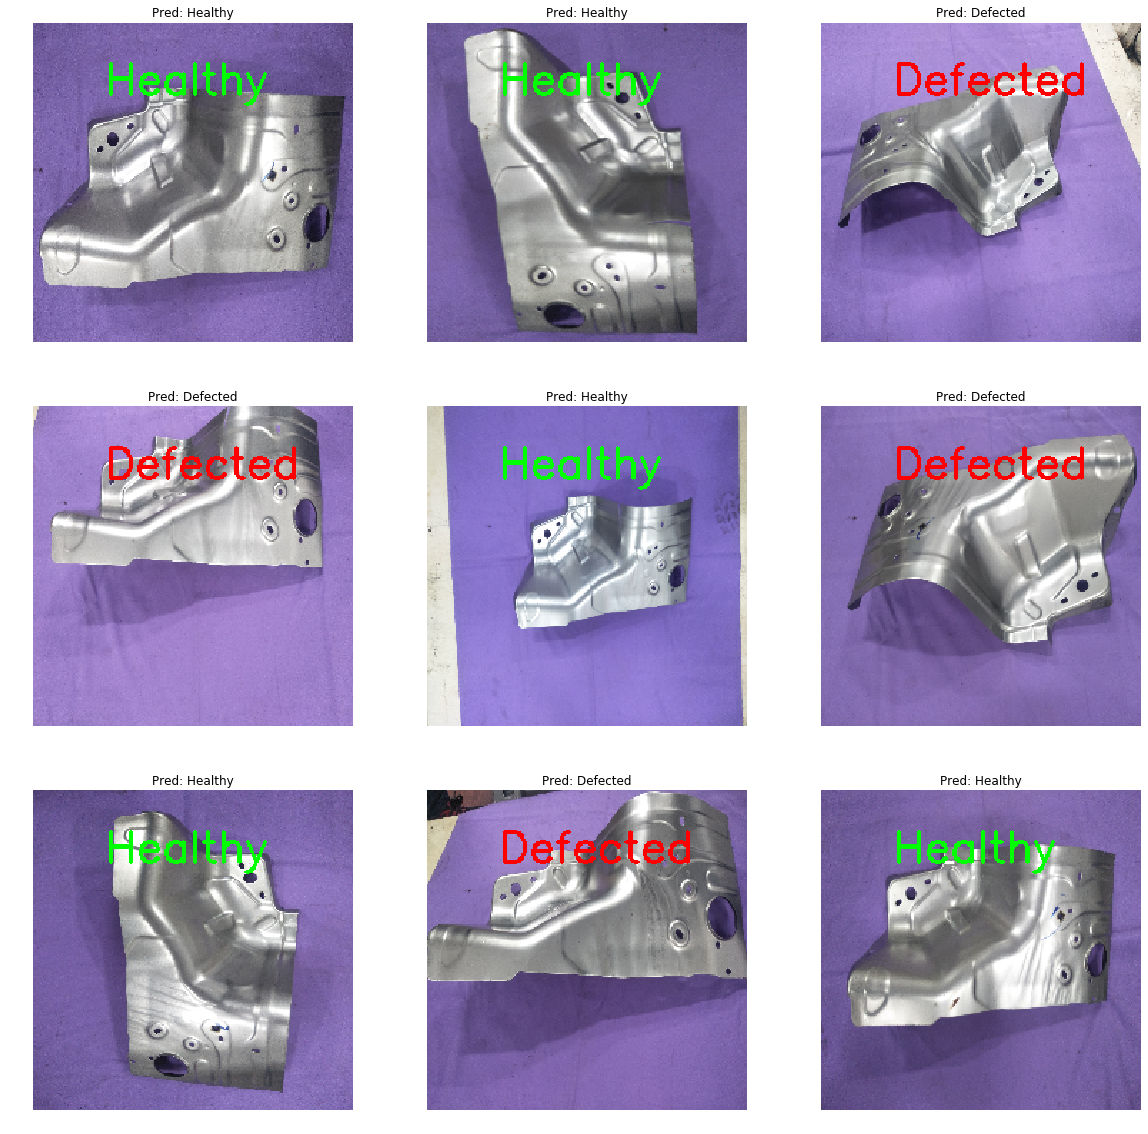

In [10]:
#Plot the predictions

rows = 3
columns = 3
fig = plt.figure(figsize=(20, 20))
for m in range(1, 10):
    if str(predIdxs[m-1]) == "0":
        text = "Healthy"
        color = (0, 255, 0)
    elif str(predIdxs[m-1]) == "1":
        text = "Defected"
        color = (255, 0, 0)
    img = testX[m-1].copy()
    # Window name in which image is displayed 
    window_name = text
  
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 
  
    # org 
    org = (50, 50) 
  
    # fontScale 
    fontScale = 1
  
    # Line thickness of 2 px 
    thickness = 2
    img = cv2.putText(img, text, org, font,
                      fontScale, color, thickness, cv2.LINE_AA)
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Pred: " + text)
    plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


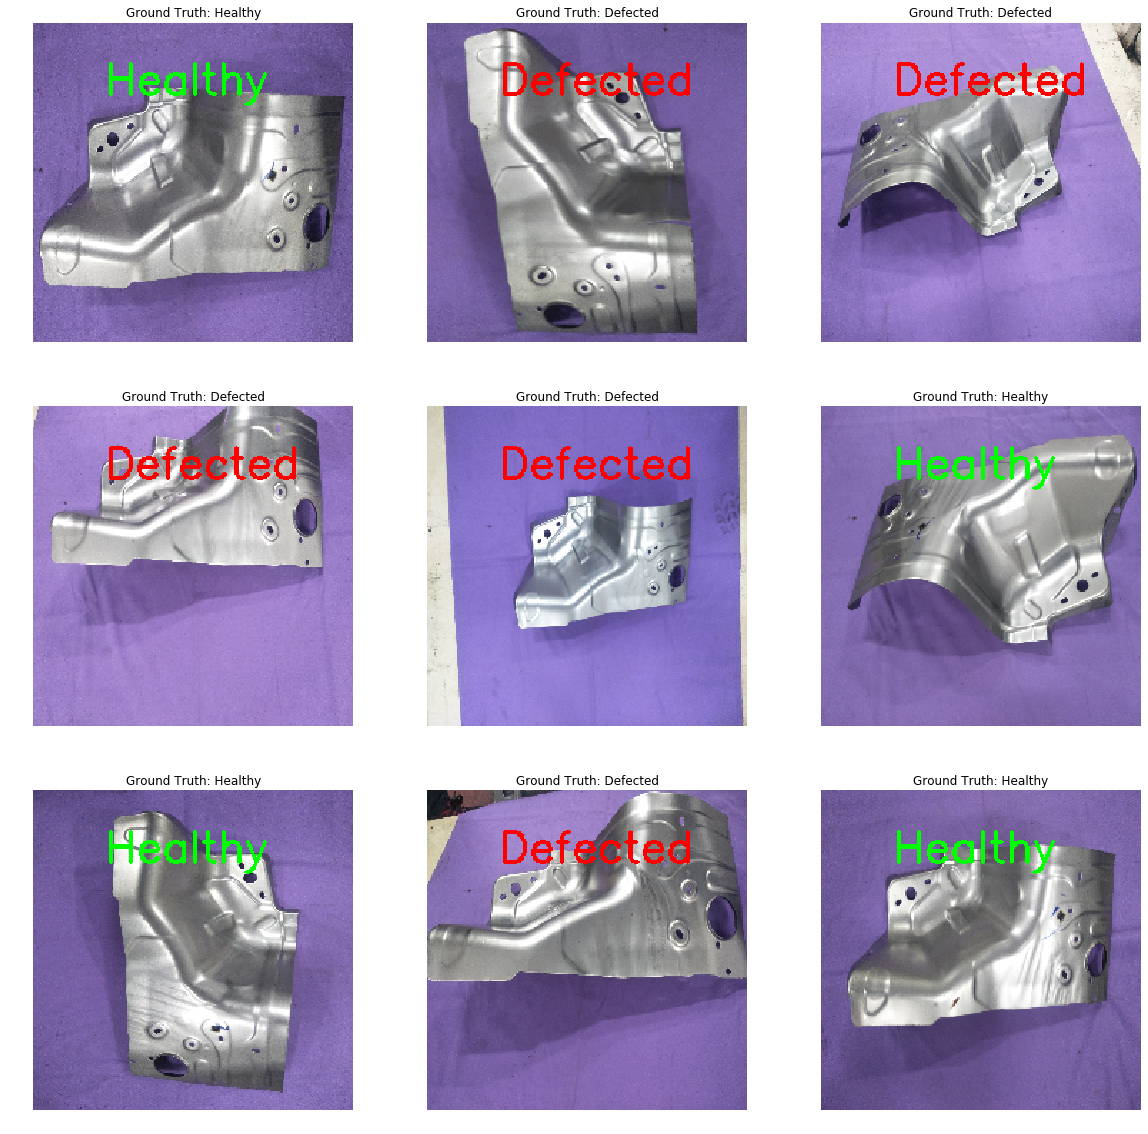

In [12]:
#Plot the Ground Truths

rows = 3
columns = 3
fig = plt.figure(figsize=(20, 20))
for m in range(1, 10):
    if str(testY.argmax(axis=1)[m-1]) == "0":
        text = "Healthy"
        color = (0, 255, 0)
    elif str(testY.argmax(axis=1)[m-1]) == "1":
        text = "Defected"
        color = (255, 0, 0)
    img = testX[m-1].copy()
    # Window name in which image is displayed 
    window_name = text
  
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 
  
    # org 
    org = (50, 50) 
  
    # fontScale 
    fontScale = 1
  
    # Line thickness of 2 px 
    thickness = 2
    img = cv2.putText(img, text, org, font,
                      fontScale, color, thickness, cv2.LINE_AA)
    fig.add_subplot(rows, columns, m)
    plt.imshow(img)
    plt.title("Ground Truth: " + text)
    plt.axis('off')
plt.show()

In [13]:
#Compute a confusion matrix for further statistical evaluation:

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[17 11]
 [ 9 13]]
acc: 0.6000
sensitivity: 0.6071
specificity: 0.5909


[INFO] saving defect detector model...


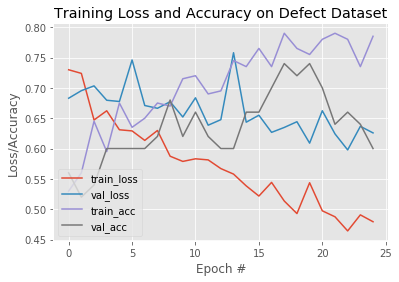

In [14]:
##Plot our training
##We plot our training accuracy/loss history for inspection, outputting the plot to an image file:


# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Defect Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(plot_path)
# serialize the model to disk
print("[INFO] saving defect detector model...")
model.save("D:\Python\Interview_Data\AI_MODEL\Model\model.h5")